In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

dataset = pd.read_csv('sgemm_product.csv')


dataset.isnull().sum()

columns = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']
df = dataset[columns].to_numpy()
a= df.mean(axis = 1)
#data.head()
datax = dataset.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis = 1)
#datax.head()
datax['runtime'] = a
datax.head()

samp=datax.sample(n=50000)


In [2]:
X1 = samp.iloc[:,0:13].values    
Y1 = samp.iloc[:,14:15].values

In [3]:
Y1 = np.where(Y1<= 69.79,0,1)


from sklearn.preprocessing import StandardScaler
dataset_sc_LogReg = StandardScaler()
X1 = dataset_sc_LogReg.fit_transform(X1)
#Y_SVM = dataset_sc_LogReg.fit_transform(Y_SVM)




In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
p = np.arange(1,5,1)
acc_train_dist = []
acc_test_dist = []
for i in p:
    KNN_class = KNeighborsClassifier(n_neighbors=5 ,p=i)
    KNN_class.fit(X_train, y_train.ravel())
    y_pred_train = KNN_class.predict(X_train)
    y_pred_test = KNN_class.predict(X_test)
    acc_train_dist.append(accuracy_score(y_train,y_pred_train))
    acc_test_dist.append(accuracy_score(y_test,y_pred_test))

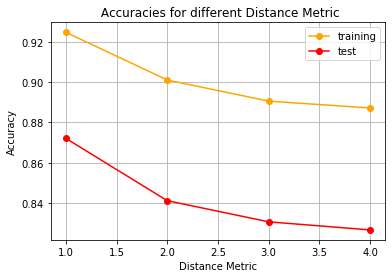

In [26]:
plt.plot(p,acc_train_dist,marker='o',markersize=6,color='orange',label='training')
plt.plot(p,acc_test_dist,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Distance Metric")
plt.xlabel("Distance Metric")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [15]:
n_neighbors = np.arange(1,21,1)
acc_train_neighbor = []
acc_test_neighbor = []
for i in n_neighbors:
    KNN_class = KNeighborsClassifier(n_neighbors=i , p = 2)
    KNN_class.fit(X_train, y_train.ravel())
    y_pred_train = KNN_class.predict(X_train)
    y_pred_test = KNN_class.predict(X_test)
    acc_train_neighbor.append(accuracy_score(y_train,y_pred_train))
    acc_test_neighbor.append(accuracy_score(y_test,y_pred_test))

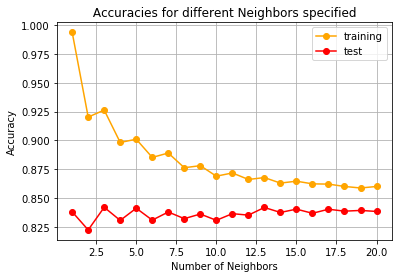

In [23]:
plt.plot(n_neighbors,acc_train_neighbor,marker='o',markersize=6,color='orange',label='training')
plt.plot(n_neighbors,acc_test_neighbor,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Neighbors specified ")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
# Varying the "weight" parameter
weight = ['uniform','distance']
acc_train_weight = []
acc_test_weight = []
for i in weight:
    KNN_class = KNeighborsClassifier(n_neighbors=6 , p = 2 , weights= i )
    KNN_class.fit(X_train, y_train.ravel())
    y_pred_train = KNN_class.predict(X_train)
    y_pred_test = KNN_class.predict(X_test)
    acc_train_weight.append(accuracy_score(y_train,y_pred_train))
    acc_test_weight.append(accuracy_score(y_test,y_pred_test))
    
 


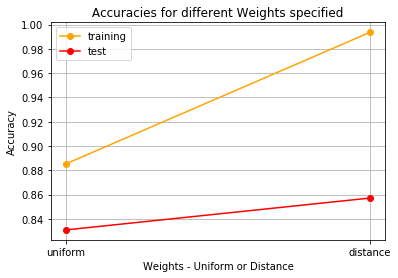

In [22]:
plt.plot(weight,acc_train_weight,marker='o',markersize=6,color='orange',label='training')
plt.plot(weight,acc_test_weight,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Weights specified ")
plt.xlabel("Weights - Uniform or Distance")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
KNN_class = KNeighborsClassifier(n_neighbors=3 , p = 2 , weights= 'distance' )
KNN_class.fit(X_train, y_train)

### predicting the test set result
y_pred = KNN_class.predict(X_test)
y_expect = y_test

### Finding the accuracy
Result = accuracy_score(y_expect , y_pred)
print(Result)

### create confusion matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)



c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.84848
[[5391  811]
 [1083 5215]]


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\hp\appdata\local\programs\pytho

0.8452


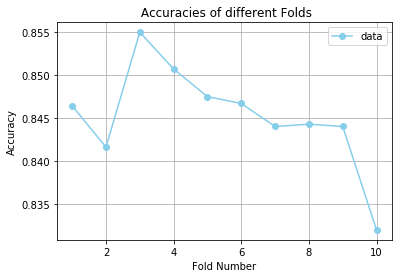

In [27]:
from sklearn.model_selection import cross_val_score
accuracies_1 = cross_val_score(estimator = KNN_class, X = X_train, y = y_train, cv = 10)
mean_acc_1 = accuracies_1.mean()
print(mean_acc_1)

plt.plot(np.arange(1,11,1),accuracies_1,marker = 'o' , markersize = 6 , color = 'skyblue',label='data')
plt.title(" Accuracies of different Folds")
plt.xlabel("Fold Number")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()